c:\Financial-News-Sentiment-Analysis


News DataFrame columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Stock DataFrame columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Available columns in news_df: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Available columns in stock_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Normalized News Dates:
 0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: Date, dtype: object
Normalized Stock Dates:
 0    1980-12-12
1    1980-12-15
2    1980-12-16
3    1980-12-17
4    1980-12-18
Name: Date, dtype: object


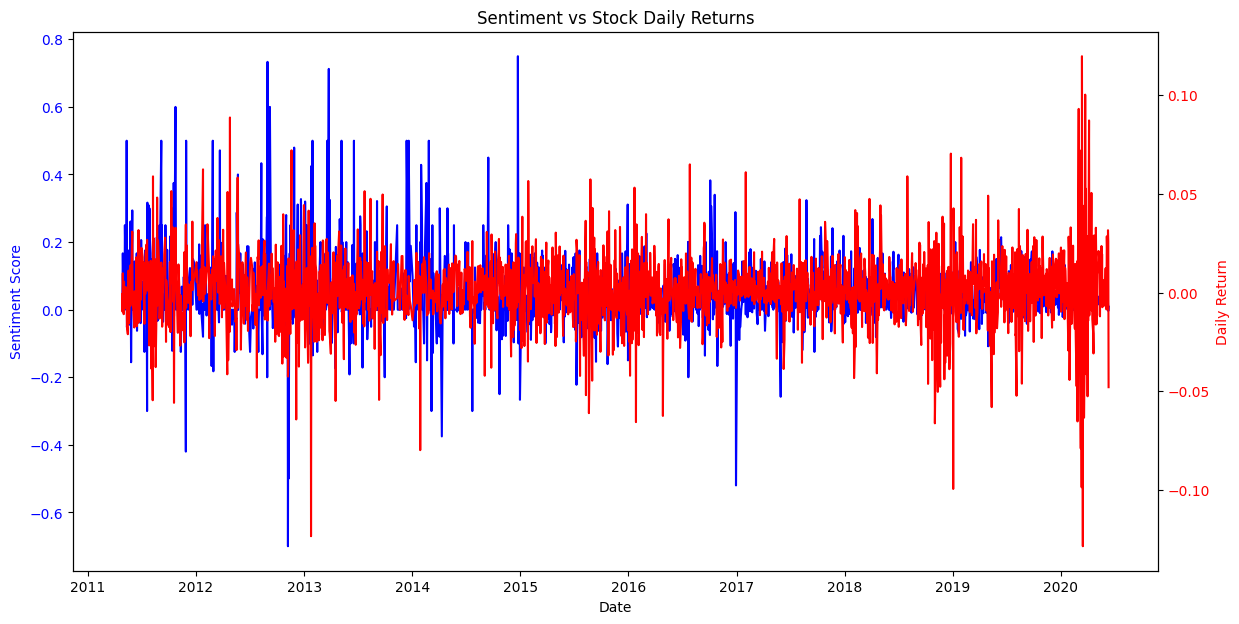

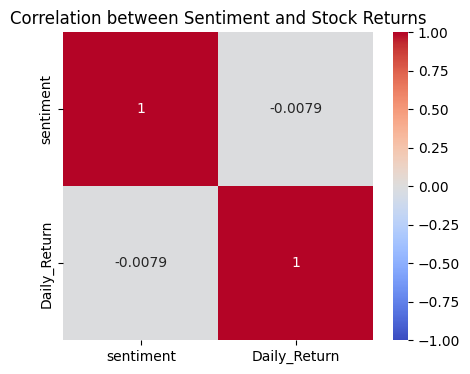

News DataFrame columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Stock DataFrame columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Available columns in news_df: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Available columns in stock_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Normalized News Dates:
 0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: Date, dtype: object
Normalized Stock Dates:
 0    1997-05-15
1    1997-05-16
2    1997-05-19
3    1997-05-20
4    1997-05-21
Name: Date, dtype: object


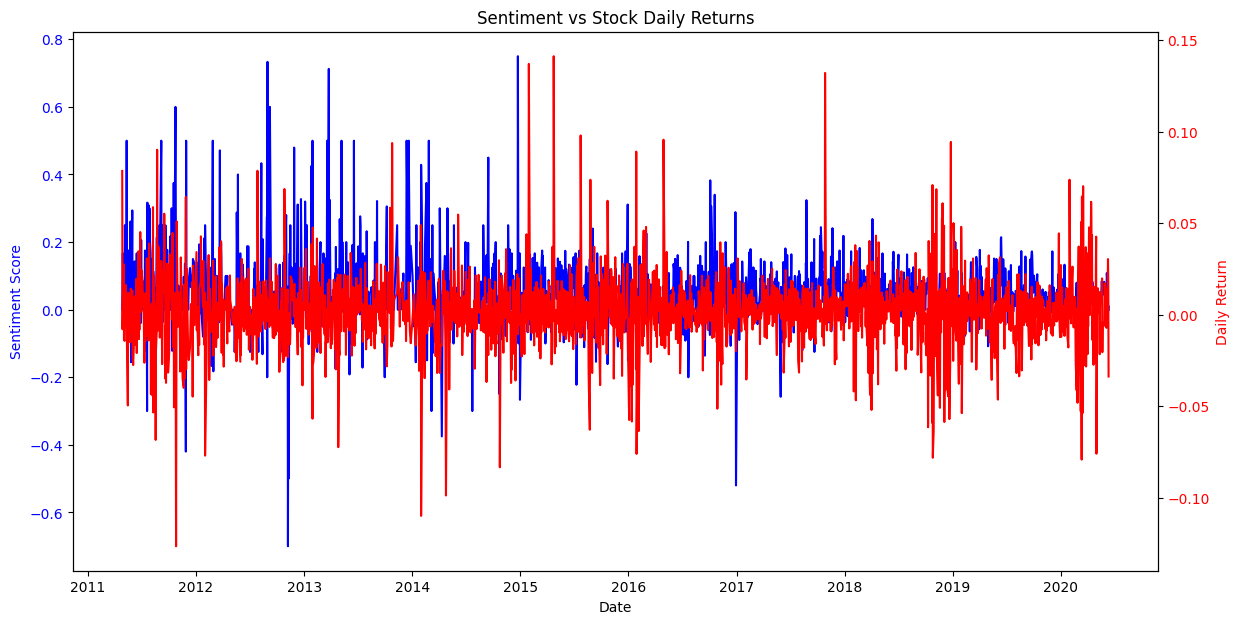

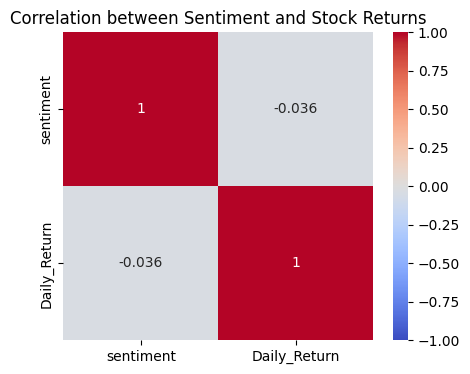

News DataFrame columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Stock DataFrame columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Available columns in news_df: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Available columns in stock_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Normalized News Dates:
 0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: Date, dtype: object
Normalized Stock Dates:
 0    2004-08-19
1    2004-08-20
2    2004-08-23
3    2004-08-24
4    2004-08-25
Name: Date, dtype: object


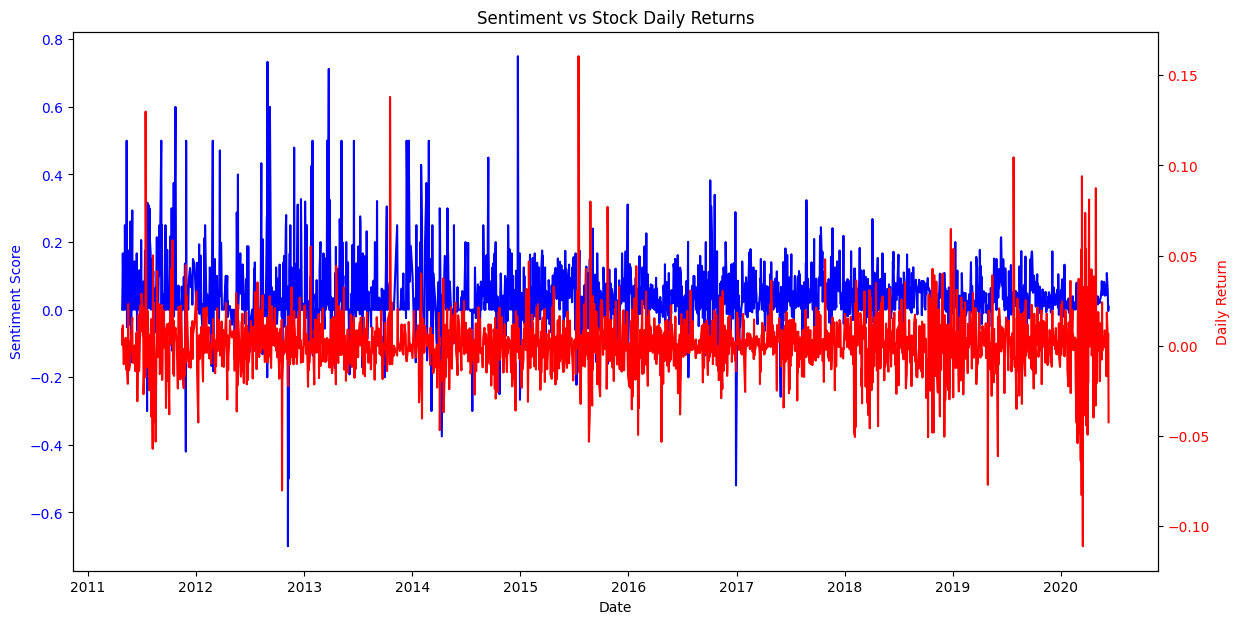

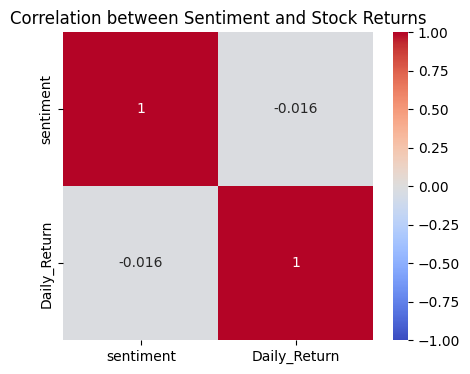

News DataFrame columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Stock DataFrame columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Available columns in news_df: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Available columns in stock_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Normalized News Dates:
 0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: Date, dtype: object
Normalized Stock Dates:
 0    2012-12-12
1    2012-12-13
2    2012-12-14
3    2012-12-17
4    2012-12-18
Name: Date, dtype: object


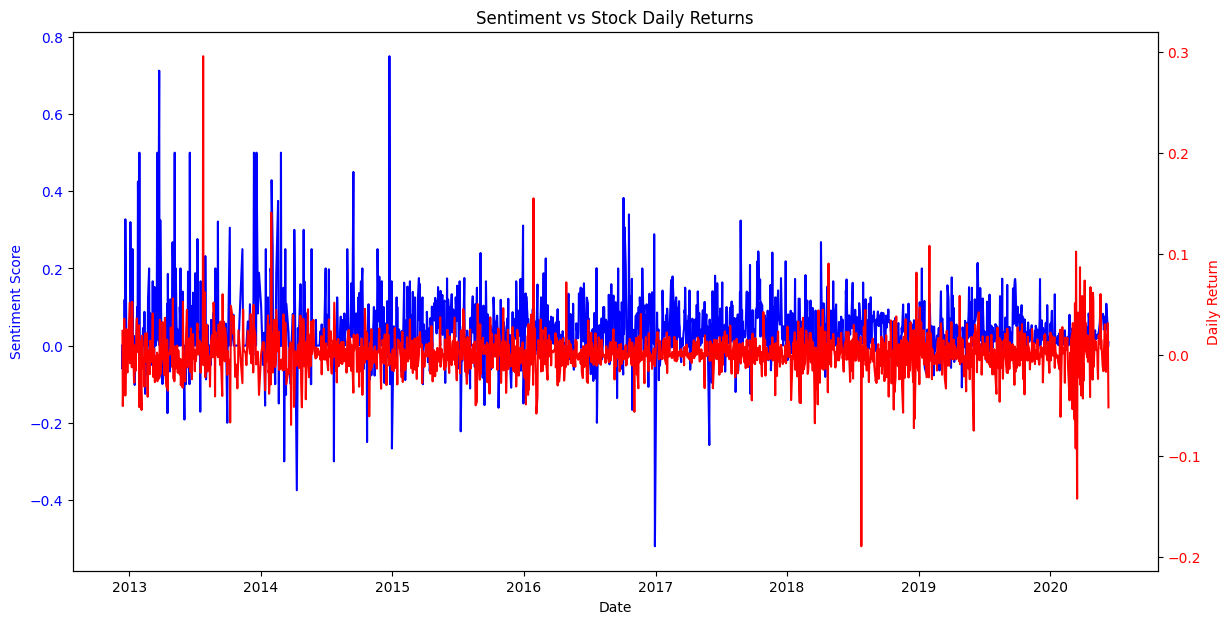

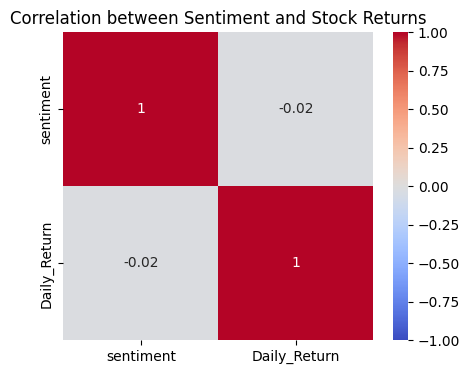

News DataFrame columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Stock DataFrame columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Available columns in news_df: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Available columns in stock_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Normalized News Dates:
 0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: Date, dtype: object
Normalized Stock Dates:
 0    1986-03-13
1    1986-03-14
2    1986-03-17
3    1986-03-18
4    1986-03-19
Name: Date, dtype: object


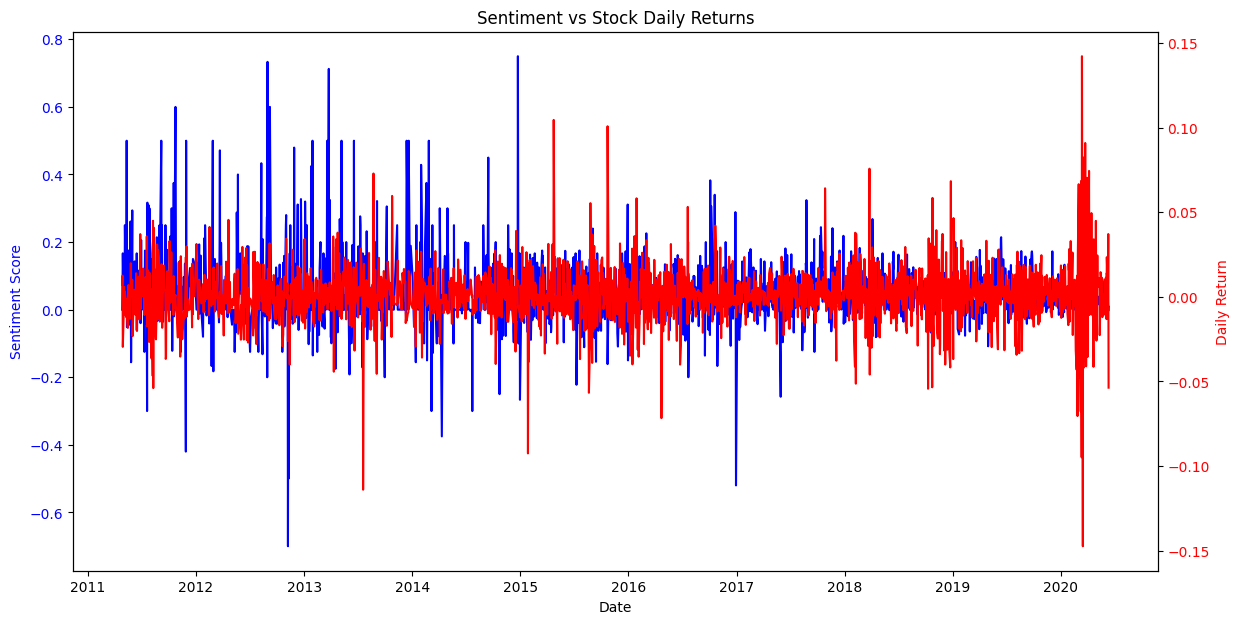

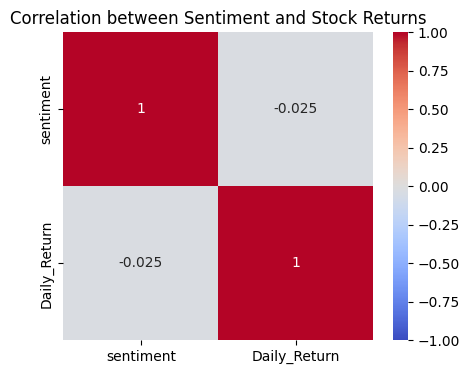

News DataFrame columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Stock DataFrame columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Available columns in news_df: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Available columns in stock_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Normalized News Dates:
 0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: Date, dtype: object
Normalized Stock Dates:
 0    1999-01-22
1    1999-01-25
2    1999-01-26
3    1999-01-27
4    1999-01-28
Name: Date, dtype: object


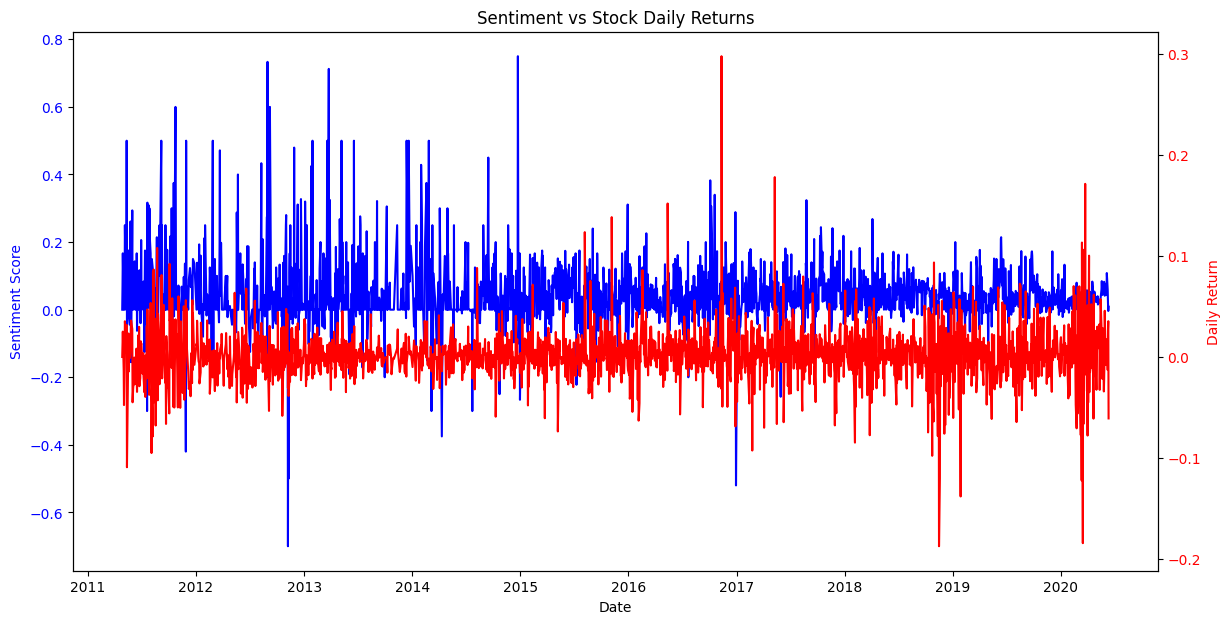

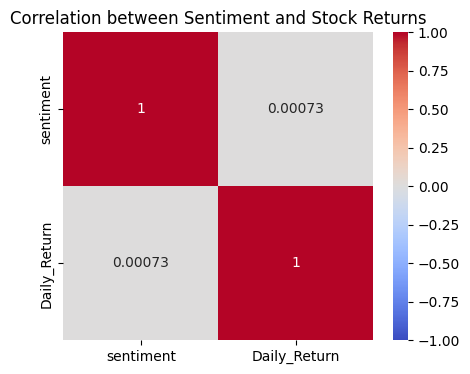

News DataFrame columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Stock DataFrame columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Available columns in news_df: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')
Available columns in stock_df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Normalized News Dates:
 0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: Date, dtype: object
Normalized Stock Dates:
 0    2010-06-29
1    2010-06-30
2    2010-07-01
3    2010-07-02
4    2010-07-06
Name: Date, dtype: object


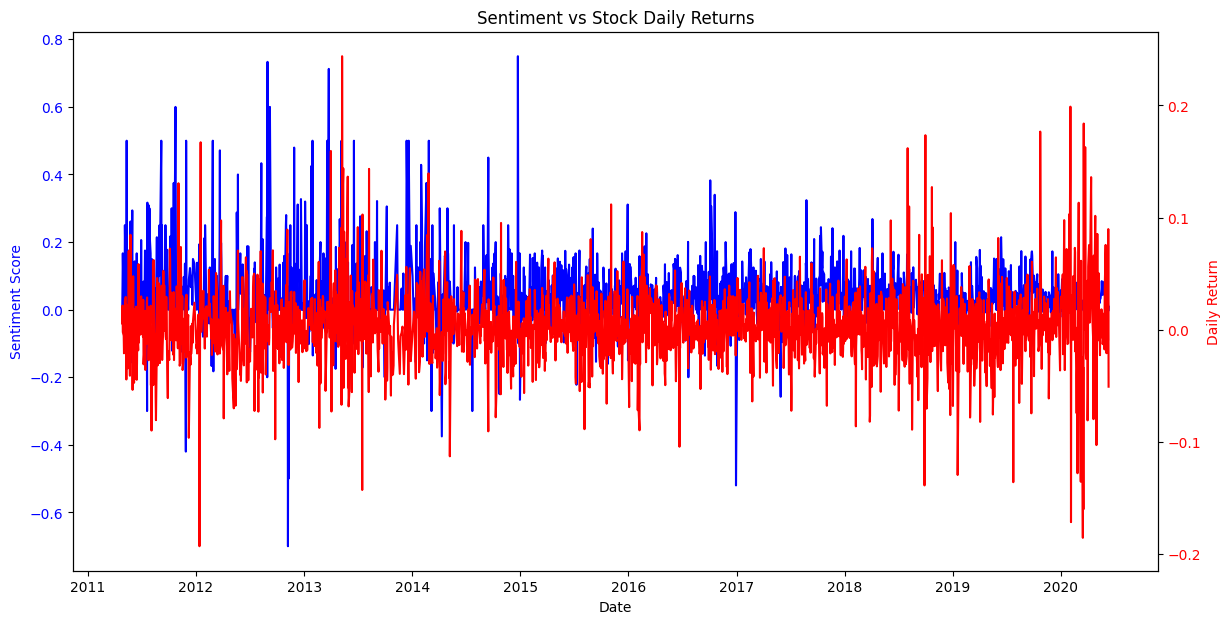

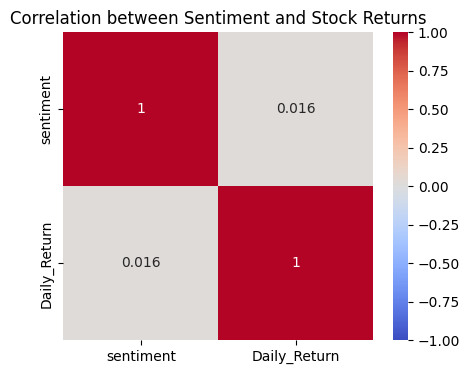

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(os.getcwd())  # This prints the current working directory
os.chdir('c:\\Financial-News-Sentiment-Analysis')  # Set the working directory to the project root


from scripts.CorrelationBetweenStockAndNews import CombinedAnalysis

# Import the display function
from IPython.display import display, HTML

# Set working directory to project root
os.chdir('c:\\Financial-News-Sentiment-Analysis')

# Define the files
news_file = 'raw_analyst_ratings.csv'
stock_files = [
    'AAPL_historical_data.csv',
    'AMZN_historical_data.csv',
    'GOOG_historical_data.csv',
    'META_historical_data.csv',
    'MSFT_historical_data.csv',
    'NVDA_historical_data.csv',
    'TSLA_historical_data.csv'
]

# Analyze each stock file
correlations = {}

for stock_file in stock_files:
    # print(f"Analyzing {stock_file}")
    display(HTML(f"<h1>Analyzing and plot corelation between {news_file} sentiment and stock returns for {stock_file}</h1>"))
    
    # Initialize the CombinedAnalysis class
    analysis = CombinedAnalysis(f'data/raw_analyst/{news_file}', f'data/yfinance_data/{stock_file}')
    
    # Perform the analysis steps
    analysis.normalize_dates()
    analysis.analyze_sentiment()
    daily_returns = analysis.calculate_daily_returns()
    correlation, merged_df = analysis.correlate_with_sentiment()
    
    # Store the correlation
    correlations[stock_file] = correlation
    # Create the figure and the primary axis
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Plot the sentiment on the primary y-axis
    ax1.plot(merged_df['Date'], merged_df['sentiment'], color='blue', label='Sentiment Score')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Sentiment Score', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    # Create a secondary y-axis for the daily return
    ax2 = ax1.twinx()
    ax2.plot(merged_df['Date'], merged_df['Daily_Return'], color='red', label='Daily Return')
    ax2.set_ylabel('Daily Return', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    # Add a title to the plot
    plt.title("Sentiment vs Stock Daily Returns")
    # Show the plot
    plt.show()

    # Display overall correlations (if this part is relevant to your context)
    # correlations = merged_df[['sentiment', 'Daily_Return']].corr()
    # print("Overall Correlations between sentiment and stock returns:")
    # print(correlations)

    # Calculate correlations
    correlations = merged_df[['sentiment', 'Daily_Return']].corr()
    # Set up the matplotlib figure
    plt.figure(figsize=(5, 4))
    # Draw the heatmap
    sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    # Add title
    plt.title("Correlation between Sentiment and Stock Returns")
    # Show the plot
    plt.show()


